In [1]:
library('dplyr')
library('effsize')
library('ggplot2')
library('foreign')
library('pscl')
library('ggrepel')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [4]:
dfMDD = read.csv('../Data/dfMDDMDDCurrPrin_satisfaction_rdq_dx_demo.csv')
log = read.spss('../Data/DemosDx/Tx Day Consent Log_1.sav')
nrow(dfMDD)
demo = read.spss('../Data/DemosDx/Demographics Form_1.sav')
dx = read.spss('../Data/DemosDx/Diagnosis_1.sav')

Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Undeclared level(s) 0, 11, 12 added in variable: DC_status_1”
Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Duplicated levels in factor DC_status_1: Other”
Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Undeclared level(s) 2 added in variable: SCID_1”
Warning message in read.spss("../Data/DemosDx/Tx Day Consent Log_1.sav"):
“Undeclared level(s) 0 added in variable: Referral_1”


[1] 844

Warning message in read.spss("../Data/DemosDx/Demographics Form_1.sav"):
“Undeclared level(s) 6 added in variable: Race_1”
Warning message in read.spss("../Data/DemosDx/Demographics Form_1.sav"):
“Undeclared level(s) 8 added in variable: Relationship_1”
Warning message in read.spss("../Data/DemosDx/Diagnosis_1.sav"):
“../Data/DemosDx/Diagnosis_1.sav: Long string value labels record found (record type 7, subtype 21), but ignored”
Warning message in read.spss("../Data/DemosDx/Diagnosis_1.sav"):
“Undeclared level(s) 22 added in variable: eatnos_1”
Warning message in read.spss("../Data/DemosDx/Diagnosis_1.sav"):
“Undeclared level(s) 10 added in variable: addhpr_1”


In [6]:
str(dx)

List of 130
 $ ID1         : num [1:7302] 1 2 3 4 5 6 7 8 9 10 ...
 $ INITIALS_1  : chr [1:7302] "        " "        " "        " "        " ...
 $ DOB_1       : num [1:7302] NA NA NA NA NA NA NA NA NA NA ...
 $ none_1      : num [1:7302] 0 0 0 0 0 0 0 0 0 0 ...
 $ etohab_1    : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ etohdp_1    : Factor w/ 7 levels "Not present",..: 1 3 3 1 1 1 1 7 3 1 ...
 $ amphab_1    : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ amphdp_1    : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mjab_1      : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mjdep_1     : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cokeab_1    : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cokedp_1    : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 7 1 1 ...
 $ hallab_1    : Factor w/ 7 levels "Not present",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ haldep_1    : Factor w/ 7 levels

In [10]:
dfMDD_dx = merge(dfMDD, dx, by = 'ID1')
dfMDD_dx$bord_1.y)


Not present  Curr, Prin        Curr    PR, Prin          PR  Past, Prin 
        683           2         159           0           0           0 
       Past 
          0 

In [13]:
min(dfMDD$ID1,na.rm = T) 

[1] 1359

In [15]:
(1911-322)/((7190-1358)+(1911-322))

[1] 0.2141221

In [12]:
#SCID'd patients
dfMDD_log = merge(dfMDD, log, by = 'ID1')
table(merge(dfMDD, log, by = 'ID1')$SCID_1 )


 no yes   2 
467 357  18 

In [17]:
dfMDD_log$bord_1 

[1] Not present Not present Not present Curr        Not present Not present
  [7] Not present Not present Not present Curr        Not present Not present
 [13] Curr        Not present Not present Not present Not present Not present
 [19] Not present Not present Not present Not present Not present Not present
 [25] Not present Not present Not present Not present Not present Not present
 [31] Not present Not present Not present Not present Curr, Prin  Curr       
 [37] Curr        Not present Not present Not present Not present Curr       
 [43] Not present Curr        Curr        Not present Not present Not present
 [49] Not present Not present Not present Not present Not present Not present
 [55] Not present Not present Not present Not present Not present Not present
 [61] Curr        Curr        Not present Not present Curr        Not present
 [67] Not present Not present Not present Not present Not present Not present
 [73] Curr        Not present Not present Not present Not present Not present
 [79] Curr        Curr        Not present Not present Not present Not present
 [85] Not present Not present Not present Not present Not present Not present
 [91] Not present Not present Not present Not present Curr        Curr       
 [97] Not present Not present Not present Not present Curr        Not present
[103] Not present Not present Not present Not present Curr        Not present
[109] Not present Not present Not present Not present Not present Not present
[115] Not present Not present Not present Not present Not present Curr       
[121] Not present Not present Not present Not present Not present Not present
[127] Not present Curr        Not present Curr        Not present Not present
[133] Not present Not present Not present Not present Curr        Not present
[139] Not present Not present Not present Not present Not present Not present
[145] Not present Not present Not present Not present Not present Not present
[151] Not present Not present Not present Not present Not present Not present
[157] Not present Not present Not present Not present Not present Not present
[163] Not present Not present Not present Not present Not present Not present
[169] Not present Not present Not present Not present Not present Not present
[175] Not present Not present Curr        Not present Not present Not present
[181] Not present Not present Not present Not present Not present Not present
[187] Not present Not present Curr        Not present Not present Not present
[193] Not present Not present Curr        Not present Curr        Not present
[199] Not present Not present Curr        Not present Not present Not present
[205] Curr        Not present Not present Not present Not present Curr       
[211] Not present Not present Not present Not present Not present Not present
[217] Not present Not present Not present Not present Curr        Not present
[223] Not present Not present Not present Curr        Not present Not present
[229] Curr        Not present Curr        Not present Not present Not present
[235] Not present Curr        Not present Not present Curr        Not present
[241] Not present Curr        Not present Not present Not present Curr       
[247] Not present Not present Not present Not present Not present Curr       
[253] Not present Not present Not present Not present Not present Curr       
[259] Not present Not present Not present Not present Not present Curr       
[265] Curr        Not present Not present Not present Curr        Not present
[271] Curr        Curr        Curr        Not present Curr        Not present
[277] Not present Not present Not present Not present Not present Not present
[283] Not present Not present Not present Not present Not present Curr       
[289] Curr        Curr        Not present Not present Not present Not present
[295] Curr        Not present Not present Not present Curr        Not present
[301] Not present Not present Not present Not present Not present Not present
[307] Not present Not pr

In [20]:
table(dfMDD_log$SCID_1[dfMDD_log$bord_1 == 'Curr' | dfMDD_log$bord_1 == 'Curr, Prin'])
77+84


 no yes   2 
 84  70   7 

[1] 161

In [44]:
dfMDD_demo = merge(dfMDD, demo, by = 'ID1')
table(dfMDD_demo$Gender_1)
round(table(dfMDD_demo$Gender_1)/844*100,1)
18/844*100
summary(dfMDD_demo$Age_1)
sd(dfMDD_demo$Age_1)



                                         Female 
                                            550 
                                           Male 
                                            265 
                                     Non-Binary 
                                             10 
                                          Other 
                                              8 
Unknown (ID as Trans Before Demos Change 12.18) 
                                             10 


                                         Female 
                                           65.2 
                                           Male 
                                           31.4 
                                     Non-Binary 
                                            1.2 
                                          Other 
                                            0.9 
Unknown (ID as Trans Before Demos Change 12.18) 
                                            1.2 

[1] 2.132701

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   25.00   34.00   36.76   47.00   82.00 

[1] 13.85607

In [45]:
table(dfMDD_demo$Relationship_1)

round(table(dfMDD_demo$Relationship_1)/844*100,1)


            Married Living with someone             Widowed           Separated 
                214                 105                  21                  23 
           Divorced       Never married                   8 
                 95                 386                   0 


            Married Living with someone             Widowed           Separated 
               25.4                12.4                 2.5                 2.7 
           Divorced       Never married                   8 
               11.3                45.7                 0.0 

In [7]:
table(dfMDD_demo$Education_1)

round(table(dfMDD_demo$Education_1)/844*100,1)

172 + 46 + 99
(172 + 46 + 99)/844*100


                       Grade 6 or less       Grade 7-12 without graduating HS 
                                     0                                     30 
                          Graduated HS                           Received GED 
                                    85                                     34 
                          Some college               Graduated 2 year college 
                                   276                                    102 
              Graduated 4 year college      Some graduate/professional school 
                                   172                                     46 
Completed graduate/professional school 
                                    99 


                       Grade 6 or less       Grade 7-12 without graduating HS 
                                   0.0                                    3.6 
                          Graduated HS                           Received GED 
                                  10.1                                    4.0 
                          Some college               Graduated 2 year college 
                                  32.7                                   12.1 
              Graduated 4 year college      Some graduate/professional school 
                                  20.4                                    5.5 
Completed graduate/professional school 
                                  11.7 

[1] 317

[1] 37.55924

In [46]:
table(dfMDD_demo$Race_1)

round(table(dfMDD_demo$Race_1)/844*100,1)

18+37
(18+37)/844*100


     White      Black   Hispanic      Asian Portuguese      Other          6 
       649         43         70         27         18         37          0 


     White      Black   Hispanic      Asian Portuguese      Other          6 
      76.9        5.1        8.3        3.2        2.1        4.4        0.0 

[1] 55

[1] 6.516588

In [47]:
table(dfMDD$imprv1)/844*100


        0         1         2         3         4 
 3.436019  7.701422 21.445498 41.706161 25.710900 

In [10]:
41.706161 + 25.710900 

[1] 67.41706

In [48]:
dfMDD$pre_cope_r = abs(dfMDD$pre_cope-2)
dfMDD$pre_pmh_r = abs(dfMDD$pre_pmh-2)
dfMDD$pre_fun_r = abs(dfMDD$pre_fun-2)
dfMDD$pre_well_r = abs(dfMDD$pre_well-2)
dfMDD$post_cope_r = abs(dfMDD$post_cope-2)
dfMDD$post_pmh_r = abs(dfMDD$post_pmh-2)
dfMDD$post_fun_r = abs(dfMDD$post_fun-2)
dfMDD$post_well_r = abs(dfMDD$post_well-2)

In [49]:
dfMDD

X,ID1,rdqpre_1_1,rdqpre_2_1,rdqpre_3_1,rdqpre_4_1,rdqpre_5_1,rdqpre_6_1,rdqpre_7_1,rdqpre_8_1,⋯,respGroup_well,imprv_cut,pre_cope_r,pre_pmh_r,pre_fun_r,pre_well_r,post_cope_r,post_pmh_r,post_fun_r,post_well_r
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1359,1,2,2,0,2,2,0,1,⋯,both,1,0.8,1.6666667,1.7,2.000,0.2,0.75000000,0.9,1.000
4,1384,2,1,2,2,0,1,2,2,⋯,both,1,1.8,1.8333333,0.9,1.500,0.4,0.08333333,1.1,0.750
7,1400,2,2,2,1,1,2,0,2,⋯,other,1,2.0,1.8333333,1.5,2.000,1.4,1.16666667,1.4,1.125
11,1412,2,2,2,0,2,0,2,2,⋯,both,1,2.0,1.9166667,1.8,2.000,0.4,0.08333333,0.0,0.000
14,1420,2,2,2,1,0,1,2,2,⋯,none,0,1.8,1.8333333,1.3,1.875,1.6,1.41666667,0.9,1.625
16,1423,2,2,2,2,0,1,2,2,⋯,both,1,1.6,1.3333333,1.1,1.375,1.0,1.08333333,0.9,0.750
17,1426,2,2,2,0,1,2,0,2,⋯,none,0,1.8,1.5833333,2.0,1.875,1.6,1.08333333,1.5,1.875
18,1429,2,1,2,1,0,1,1,2,⋯,none,1,1.4,1.4166667,0.8,1.375,1.4,1.33333333,0.8,1.250
19,1436,2,2,2,2,0,1,2,2,⋯,both,1,1.8,2.0000000,1.9,2.000,0.4,0.58333333,1.0,0.625


In [53]:
dfMDD$pre_dsym_sum = rowSums(dfMDD[grep('rdqpre_[1-9]_1|rdqpre_1[0-4]_1', colnames(dfMDD))])
dfMDD$pre_ndsym_sum = rowSums(dfMDD[grep('rdqpre_1[5-9]_1|rdqpre_2[0-5]_1', colnames(dfMDD))])

#dfMDD$pre_cope_sum = rowSums(dfMDD[grep('rdqpre_2[6-9]_1|rdqpre_30_1', colnames(dfMDD))])
#dfMDD$pre_pmh_sum = rowSums(dfMDD[grep('rdqpre_3[1-9]_1|rdqpre_4[0-2]_1', colnames(dfMDD))])
#dfMDD$pre_fun_sum = rowSums(dfMDD[grep('rdqpre_4[3-9]_1|rdqpre_5[0-2]_1', colnames(dfMDD))])
#dfMDD$pre_well_sum = rowSums(dfMDD[grep('rdqpre_5[3-9]_1|rdqpre_69_1', colnames(dfMDD))])

dfMDD$pre_cope_r_sum = rowSums(abs(dfMDD[grep('rdqpre_2[6-9]_1|rdqpre_30_1', colnames(dfMDD))]-2))
dfMDD$pre_pmh_r_sum = rowSums(abs(dfMDD[grep('rdqpre_3[1-9]_1|rdqpre_4[0-2]_1', colnames(dfMDD))]-2))
dfMDD$pre_fun_r_sum = rowSums(abs(dfMDD[grep('rdqpre_4[3-9]_1|rdqpre_5[0-2]_1', colnames(dfMDD))]-2))
dfMDD$pre_well_r_sum = rowSums(abs(dfMDD[grep('rdqpre_5[3-9]_1|rdqpre_69_1', colnames(dfMDD))]-2))

dfMDD$post_dsym_sum = rowSums(dfMDD[grep('rdqpost_[1-9]_1|rdqpost_1[0-4]_1', colnames(dfMDD))])
dfMDD$post_ndsym_sum = rowSums(dfMDD[grep('rdqpost_1[5-9]_1|rdqpost_2[0-5]_1', colnames(dfMDD))])
#dfMDD$post_cope_sum = rowSums(dfMDD[grep('rdqpost_2[6-9]_1|rdqpost_30_1', colnames(dfMDD))])
#dfMDD$post_pmh_sum = rowSums(dfMDD[grep('rdqpost_3[1-9]_1|rdqpost_4[0-2]_1', colnames(dfMDD))])
#dfMDD$post_fun_sum = rowSums(dfMDD[grep('rdqpost_4[3-9]_1|rdqpost_5[0-2]_1', colnames(dfMDD))])
#dfMDD$post_well_sum = rowSums(dfMDD[grep('rdqpost_5[3-9]_1|rdqpost_69_1', colnames(dfMDD))])
dfMDD$post_cope_r_sum = rowSums(abs(dfMDD[grep('rdqpost_2[6-9]_1|rdqpost_30_1', colnames(dfMDD))]-2))
dfMDD$post_pmh_r_sum = rowSums(abs(dfMDD[grep('rdqpost_3[1-9]_1|rdqpost_4[0-2]_1', colnames(dfMDD))]-2))
dfMDD$post_fun_r_sum = rowSums(abs(dfMDD[grep('rdqpost_4[3-9]_1|rdqpost_5[0-2]_1', colnames(dfMDD))]-2))
dfMDD$post_well_r_sum = rowSums(abs(dfMDD[grep('rdqpost_5[3-9]_1|rdqpost_69_1', colnames(dfMDD))]-2))
                                                            

In [52]:
 dfMDD[,grep(paste0('pre_', facet,'_sum'), colnames(dfMDD))]

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1  
2  
3  
4  
5  
6  
7  
8  
9  
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
⋮  
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844

In [55]:
facets = c('dsym', 'ndsym', 'cope_r', 'pmh_r', 'fun_r', 'well_r')
prePostMean = matrix(0, nrow = 6, ncol = 4)

for (i in 1:6){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'_sum'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'_sum'), colnames(dfMDD))]
    prePostMean[i, 1] = paste0(round(mean(preScore),2),' (', round(sd(preScore),2),')')
    prePostMean[i, 2] = paste0(round(mean(postScore),2),' (', round(sd(postScore),2),')')
    prePostMean[i, 3] = round(cohen.d(preScore, postScore)$estimate, 2)
    prePostMean[i, 4] = paste0(
        round(sum(ifelse(preScore-postScore > 0.5*preScore, 1, 0))/nrow(dfMDD)*100, 2),'% (', 
        sum(ifelse((preScore-postScore) > 0.5*preScore, 1, 0)),')')   
}

#for (i in 3:6){
#    facet = facets[i]
#    preScore = dfMDD[,grep(paste0('pre_', facet,'_sum'), colnames(dfMDD))]
#    postScore = dfMDD[,grep(paste0('post_', facet,'_sum'), colnames(dfMDD))]
#    prePostMean[i, 1] = paste0(round(mean(preScore),2),' (', round(sd(preScore),2),')')
#    prePostMean[i, 2] = paste0(round(mean(postScore),2),' (', round(sd(postScore),2),')')
#    prePostMean[i, 3] = round(cohen.d(preScore, postScore)$estimate, 2)
#    prePostMean[i, 4] = paste0(
#        round(sum(ifelse(postScore-preScore > 0.5*preScore, 1, 0))/nrow(dfMDD)*100, 2),'% (', 
#        sum(ifelse((postScore-preScore) > 0.5*preScore, 1, 0)),')')   
#}

prePostMean = as.data.frame(prePostMean)
colnames(prePostMean) = c('Admission M(SD)', 'Discharge M(SD)', "Cohen's d", 'Responders %(n)')
rownames(prePostMean) = facets
write.csv(prePostMean, '../Results/prePostRDQMeanSD_Cohen_50Responder.csv')

prePostMean

,Admission M(SD),Discharge M(SD),Cohen's d,Responders %(n)
,<fct>,<fct>,<fct>,<fct>
dsym,19.25 (4.19),11.11 (6.13),1.55,38.74% (327)
ndsym,14.3 (4.82),8.46 (5.51),1.13,40.28% (340)
cope_r,7.37 (2.05),4.65 (2.54),1.18,30.09% (254)
pmh_r,19.19 (4.15),11.8 (6.39),1.37,33.06% (279)
fun_r,12.96 (3.82),8.23 (4.8),1.09,32.82% (277)
well_r,11.58 (2.67),7.32 (3.99),1.25,29.98% (253)


In [57]:
nRDQResponder = matrix(0, ncol = 6, nrow = nrow(dfMDD))
for (i in 1:6){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    
    nRDQResponder[,i] = ifelse((preScore-postScore) > 0.5*preScore, 1, 0)
    
}

#for (i in 3:6){
#    facet = facets[i]
#    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
#    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
#    
#    nRDQResponder[,i] = ifelse((postScore-preScore) >= 0.5*preScore, 1, 0)
#    
#}

nRDQResponderTable = as.data.frame(table(rowSums(nRDQResponder)))
nRDQResponderTable$percent = paste0(round(nRDQResponderTable$Freq/nrow(dfMDD)*100,2),'%')
write.csv(nRDQResponderTable, '../Results/nRDQResponderTable.csv', row.names = F)
nRDQResponderTable

Var1,Freq,percent
<fct>,<int>,<chr>
0,322,38.15%
1,114,13.51%
2,105,12.44%
3,65,7.7%
4,59,6.99%
5,78,9.24%
6,101,11.97%


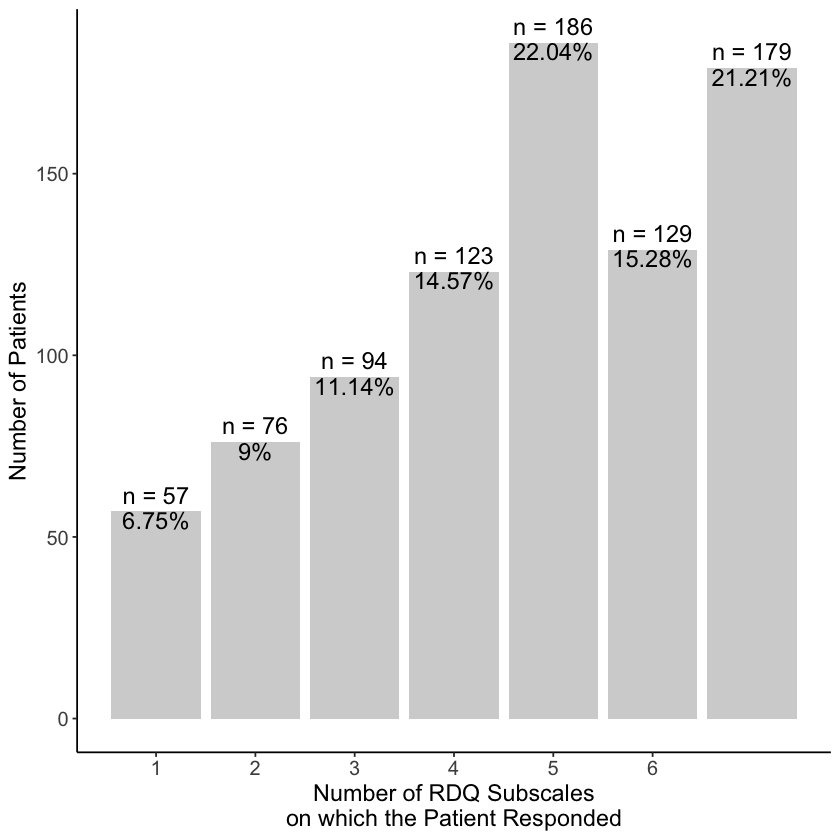

In [16]:
ggplot(nRDQResponderTable, aes(x=as.numeric(Var1), y = Freq)) +
    geom_bar(stat = 'identity', fill = 'light grey') + 
    geom_text(aes(label=paste0('n = ',Freq)), position='identity', size=5, vjust = -0.5) +
    geom_text(aes(label=percent), position='identity', size=5, vjust=1) +
    scale_x_continuous(breaks = seq(0, 6, by = 1)) +
    theme_classic() +
    xlab("Number of RDQ Subscales\non which the Patient Responded") + 
    ylab("Number of Patients") + 
    theme(
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12)) +
    ggsave('../Results/RDQResponderImprv.pdf',width = 8, height = 8)


In [19]:
mean(rowSums(nRDQResponder))
sd(rowSums(nRDQResponder))

[1] 3.668246

[1] 1.837758

In [62]:
nRDQResponderPairwisePercent = matrix(0, ncol = 6, nrow = 7)
nRDQResponderPairwiseCorr = matrix(0, ncol = 6, nrow = 6)

for (i in 1:6){
    for (j in 1:length(facets)){
        facet1 = facets[i]
        facet2 = facets[j]
        
        preScore1 = dfMDD[,grep(paste0('pre_', facet1,'$'), colnames(dfMDD))]
        postScore1 = dfMDD[,grep(paste0('post_', facet1,'$'), colnames(dfMDD))]
        preScore2 = dfMDD[,grep(paste0('pre_', facet2,'$'), colnames(dfMDD))]
        postScore2 = dfMDD[,grep(paste0('post_', facet2,'$'), colnames(dfMDD))]
        
        facet1ResStatus = ifelse(preScore1 - postScore1 > 0.5*preScore1, 1, 0)
        facet2ResStatus = ifelse(preScore2 - postScore2> 0.5*preScore2, 1, 0)
    
        facet2Res = which((preScore2-postScore2) > 0.5*preScore2)
        facet1ResIn2 = sum(preScore1[facet2Res] - postScore1[facet2Res] > 0.5*preScore1[facet2Res]
                          )/length(facet2Res)*100
        
        
        
        nRDQResponderPairwisePercent[i,j] =  facet1ResIn2
        nRDQResponderPairwiseCorr[i,j] =  cor(facet1ResStatus, facet2ResStatus )
        
    }
}

#for (i in 3:6){
#    for (j in 1:length(facets)){
#        facet1 = facets[i]
#        facet2 = facets[j]
#        
#        preScore1 = dfMDD[,grep(paste0('pre_', facet1,'$'), colnames(dfMDD))]
#        postScore1 = dfMDD[,grep(paste0('post_', facet1,'$'), colnames(dfMDD))]
#        preScore2 = dfMDD[,grep(paste0('pre_', facet2,'$'), colnames(dfMDD))]
#        postScore2 = dfMDD[,grep(paste0('post_', facet2,'$'), colnames(dfMDD))]
#    
#        facet2Res = which((postScore2-preScore2) >= 0.5*preScore2)
#        facet1ResIn2 = sum(postScore1[facet2Res] - preScore1[facet2Res] >= 0.5*preScore1[facet2Res]
#                          )/length(facet2Res)*100
#        
#        nRDQResponderPairwisePercent[i,j] =  facet1ResIn2
#    }
#}


diag(nRDQResponderPairwisePercent) = NA
nRDQResponderPairwisePercent[7,] = colMeans(nRDQResponderPairwisePercent[1:6,], na.rm = T)
nRDQResponderPairwisePercent = as.data.frame(nRDQResponderPairwisePercent)
colnames(nRDQResponderPairwisePercent) = rownames(nRDQResponderPairwisePercent)[1:6] = facets
rownames(nRDQResponderPairwisePercent)[7] = 'average'
nRDQResponderPairwisePercent = apply(nRDQResponderPairwisePercent, 2, function(x) paste0(round(x,2),'%'))
diag(nRDQResponderPairwisePercent) = NA

write.csv(nRDQResponderPairwisePercent, '../Results/nRDQResponderPairwisePercent.csv')

nRDQResponderPairwisePercent
                                     
round(nRDQResponderPairwiseCorr,2)
                                     

dsym,ndsym,cope_r,pmh_r,fun_r,well_r
NA,71.47%,72.87%,76.41%,71.48%,77.91%
74.31%,NA,71.32%,67.96%,69.01%,71.71%
57.49%,54.12%,NA,62.68%,63.73%,67.44%
66.36%,56.76%,68.99%,NA,70.07%,82.56%
62.08%,57.65%,70.16%,70.07%,NA,75.19%
61.47%,54.41%,67.44%,75%,68.31%,NA
64.34%,58.88%,70.16%,70.42%,68.52%,74.96%


1.00,0.55,0.46,0.55,0.48,0.53
0.55,1.00,0.42,0.40,0.42,0.43
0.46,0.42,1.00,0.50,0.51,0.53
0.55,0.40,0.50,1.00,0.55,0.69
0.48,0.42,0.51,0.55,1.00,0.58
0.53,0.43,0.53,0.69,0.58,1.00


In [21]:
mean(dfMDD$imprv1)
sd(dfMDD$imprv1)
table(dfMDD$imprv1)
round(table(dfMDD$imprv1)/844*100,1)
352 +217
(352 +217)/844*100

[1] 2.785545

[1] 1.021816


  0   1   2   3   4 
 29  65 181 352 217 


   0    1    2    3    4 
 3.4  7.7 21.4 41.7 25.7 

[1] 569

[1] 67.41706

In [22]:
nRDQResponderPairwiseKappa= matrix(0, ncol = 6, nrow = 6)
for (i in 1:length(facets)){
    for (j in 1:length(facets)){
        facet1 = facets[i]
        facet2 = facets[j]
        
        preScore1 = dfMDD[,grep(paste0('pre_', facet1), colnames(dfMDD))]
        postScore1 = dfMDD[,grep(paste0('post_', facet1), colnames(dfMDD))]
        preScore2 = dfMDD[,grep(paste0('pre_', facet2), colnames(dfMDD))]
        postScore2 = dfMDD[,grep(paste0('post_', facet2), colnames(dfMDD))]
        
        facet1Res = ifelse((preScore1-postScore1) > 0.5*preScore1,1,0)
    
        facet2Res = ifelse((preScore2-postScore2) > 0.5*preScore2, 1, 0)
        
        kappa = (sum(facet1Res[facet2Res==1]==1) + sum(facet1Res[facet2Res==0]==0))/nrow(dfMDD)
        nRDQResponderPairwiseKappa[i,j] = round(kappa,2)
       
    }
}

nRDQResponderPairwiseKappa = as.data.frame(nRDQResponderPairwiseKappa)
colnames(nRDQResponderPairwiseKappa) = rownames(nRDQResponderPairwiseKappa) = facets
write.csv(nRDQResponderPairwiseKappa, '../Results/nRDQResponderPairwiseKappa.csv')
nRDQResponderPairwiseKappa

,dsym,ndsym,cope,pmh,fun,well
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
dsym,2.00,1.57,1.15,1.17,1.17,1.15
ndsym,1.57,2.00,1.12,1.15,1.14,1.15
cope,1.15,1.12,2.00,1.92,1.91,1.87
pmh,1.17,1.15,1.92,2.00,1.90,1.90
fun,1.17,1.14,1.91,1.90,2.00,1.89
well,1.15,1.15,1.87,1.90,1.89,2.00


In [23]:
imprvByNRDQ = 
    data.frame(nRDQRespond = rowSums(nRDQResponder), imprv = dfMDD$imprv1) %>%
        group_by(nRDQRespond) %>%
        summarize(n = n(), `M(SD)` = paste0(round(mean(imprv),2),' (', round(sd(imprv),2),')'))

imprvByNRDQ

`summarise()` ungrouping output (override with `.groups` argument)



nRDQRespond,n,M(SD)
<dbl>,<int>,<chr>
0,57,2.02 (0.99)
1,76,2.07 (1.07)
2,94,2.32 (1.1)
3,123,2.59 (0.98)
4,186,2.8 (0.92)
5,129,3.14 (0.73)
6,179,3.45 (0.7)


In [24]:
imprvByNRDQTtestData = data.frame(nRDQRespond = rowSums(nRDQResponder), imprv = dfMDD$imprv1)
imprvByNRDQ$t_val = NA
imprvByNRDQ$p_val = NA

for (i in 0:5){
    sample1 = imprvByNRDQTtestData[imprvByNRDQTtestData$nRDQRespond== i,'imprv'] 
    sample2 = imprvByNRDQTtestData[imprvByNRDQTtestData$nRDQRespond== i+1, 'imprv'] 
   
    tRes = t.test(sample1,sample2)
   
    imprvByNRDQ$t_val[i+1] = round(tRes$statistic,2)
    imprvByNRDQ$p_val[i+1] = round(tRes$p.value, 3)
}

write.csv(imprvByNRDQ, '../Results/imprvByNRDQ.csv')
imprvByNRDQ

nRDQRespond,n,M(SD),t_val,p_val
<dbl>,<int>,<chr>,<dbl>,<dbl>
0,57,2.02 (0.99),-0.27,0.789
1,76,2.07 (1.07),-1.51,0.132
2,94,2.32 (1.1),-1.85,0.066
3,123,2.59 (0.98),-1.88,0.061
4,186,2.8 (0.92),-3.69,0.000
5,129,3.14 (0.73),-3.78,0.000
6,179,3.45 (0.7),NA,NA


In [25]:
imprvByNRDQ4 = 
    imprvByNRDQTtestData %>%
        group_by(nRDQRespond) %>%
        summarize(n = n(), 
                  Rating3Per = paste0(round(sum(imprv==3)/n()*100,2), '%'),
                  Rating4Per = paste0(round(sum(imprv>=4)/n()*100,2), '%'),
                  Rating3or4Per = paste0(round(sum(imprv>=3)/n()*100,2), '%'))

write.csv(imprvByNRDQ4, '../Results/imprvByNRDQ4.csv')
imprvByNRDQ4

`summarise()` ungrouping output (override with `.groups` argument)



nRDQRespond,n,Rating3Per,Rating4Per,Rating3or4Per
<dbl>,<int>,<chr>,<chr>,<chr>
0,57,31.58%,3.51%,35.09%
1,76,31.58%,6.58%,38.16%
2,94,37.23%,11.7%,48.94%
3,123,42.28%,16.26%,58.54%
4,186,47.31%,21.51%,68.82%
5,129,54.26%,31.01%,85.27%
6,179,36.31%,55.31%,91.62%


In [26]:
ggplotdata = 
imprvByNRDQTtestData %>%
    group_by(nRDQRespond, imprv) %>%
    summarize(count = n()) %>%
    group_by(nRDQRespond) %>%
    summarize(imprv = imprv, count = count,  perc = paste0(round(count/sum(count)*100, 2),'%'))


`summarise()` regrouping output by 'nRDQRespond' (override with `.groups` argument)

`summarise()` regrouping output by 'nRDQRespond' (override with `.groups` argument)



In [27]:
library(rlang)

position_stack_repel <- function(vjust = 1, reverse = FALSE, 
                                 offset = 1) {
  ggproto(NULL, PositionStackRepel, vjust = vjust, reverse = reverse,
          offset = offset)
}

PositionStackRepel <- ggproto("PositionStackRepel", PositionStack,
  type = NULL,
  vjust = 1,
  fill = FALSE,
  reverse = FALSE,
  offset = 1,

  setup_params = function(self, data) {
    list(
      var = self$var %||% ggplot2:::stack_var(data),
      fill = self$fill,
      vjust = self$vjust,
      reverse = self$reverse,
      offset = self$offset
    )
  },

  setup_data = function(self, data, params) {
    data <- PositionStack$setup_data(data, params)
    data <- data[order(data$x), ]
    data$to_repel <- unlist(by(data, data$x, function(x) {
      sapply(seq(nrow(x)), function(i) {
        (x$y[i]) / sum(x$y) < 0.1 & (
          (if (i != 1) (x$y[i-1] / sum(x$y)) < 0.1 else FALSE) | (
            if (i != nrow(x)) (x$y[i+1] / sum(x$y)) < 0.1 else FALSE))
      })
    }))
    data
  },

  compute_panel = function(data, params, scales) {
    data <- PositionStack$compute_panel(data, params, scales)
    data[data$to_repel, "x"] <- unlist(
      by(data[data$to_repel, ], data[data$to_repel, ]$x, 
         function(x) seq(x$x[1] - 0.4, x$x[1] + 0.4, length.out = nrow(x))))
    data
  }
)

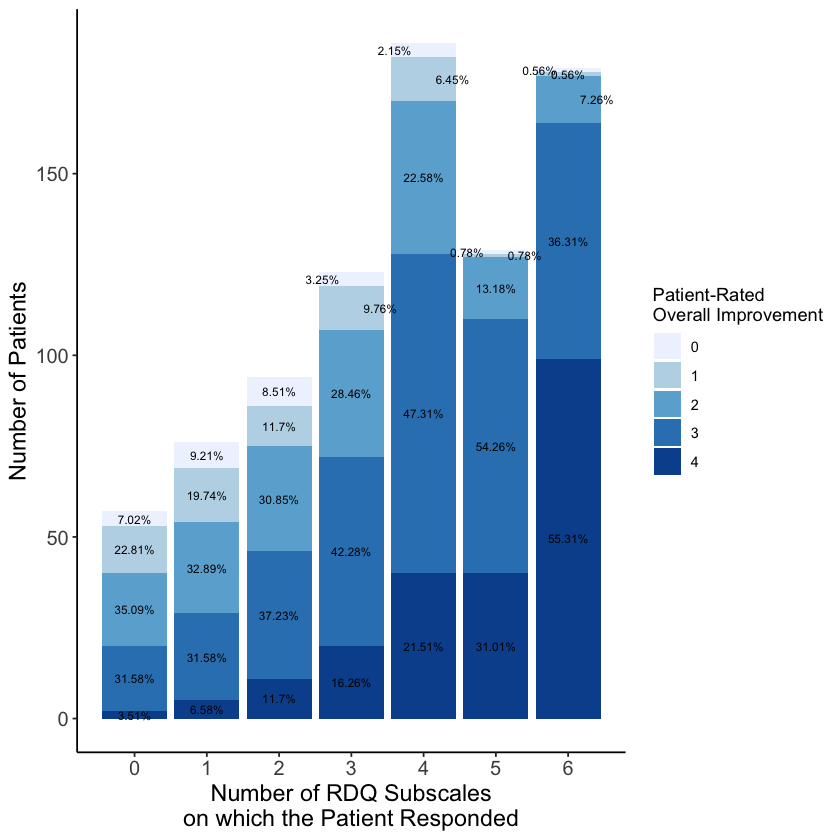

In [28]:

# To use for fills, add
ggplot(ggplotdata, aes(x=nRDQRespond, y = count, fill = as.factor(imprv))) +
    geom_bar(stat = 'identity')+
    geom_text(aes(label=perc), position=position_stack_repel(vjust=0.5), size=2.5) +
    scale_x_continuous(breaks = seq(0, 6, by = 1)) +
    scale_fill_brewer() + 
    theme_classic() +
    xlab("Number of RDQ Subscales\non which the Patient Responded") + 
    ylab("Number of Patients") +
    labs(fill = "Patient-Rated\nOverall Improvement") +
    theme(
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12)) +
    ggsave('../Results/RDQResponderImprv.pdf',width = 8, height = 8)


In [29]:
chisq_result = chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv==3, '1', '0'))
chisq_result

chisq_result = chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv>=4, '1', '0'))
chisq_result

chisq_result = chisq.test(imprvByNRDQTtestData$nRDQRespond, ifelse(imprvByNRDQTtestData$imprv>=3, '1', '0'))
chisq_result



	Pearson's Chi-squared test

data:  imprvByNRDQTtestData$nRDQRespond and ifelse(imprvByNRDQTtestData$imprv == 3, "1", "0")
X-squared = 19.313, df = 6, p-value = 0.003667



	Pearson's Chi-squared test

data:  imprvByNRDQTtestData$nRDQRespond and ifelse(imprvByNRDQTtestData$imprv >= 4, "1", "0")
X-squared = 130.39, df = 6, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  imprvByNRDQTtestData$nRDQRespond and ifelse(imprvByNRDQTtestData$imprv >= 3, "1", "0")
X-squared = 142.39, df = 6, p-value < 2.2e-16


In [30]:
rdqResImprvEach = matrix(0, ncol = 4, nrow = 6)

for (i in 1:6){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    responder = which((preScore - postScore)> 0.5*preScore)
    responderImprv = dfMDD$imprv1[responder]
    nonresponderImprv = dfMDD$imprv1[-responder]
    rdqResImprvEach[i,1] = paste0(round(mean(responderImprv),2),' (',
                                  round(sd(responderImprv),2),')')
    
    rdqResImprvEach[i,2] = paste0(round(mean(nonresponderImprv),2),' (',
                                  round(sd(nonresponderImprv),2),')')
    
    tRes = t.test(responderImprv, nonresponderImprv)
    
    rdqResImprvEach[i,3] = round(tRes$statistic,2)
    rdqResImprvEach[i,4] = round(tRes$p.value,3)
    
}

rdqResImprvEach = as.data.frame(rdqResImprvEach)
rownames(rdqResImprvEach) = facets
colnames(rdqResImprvEach) = c('Responder M(SD)', 'Nonresponder M(SD)', 't-value', 'p-value')
write.csv(rdqResImprvEach, 'rdqResImprvEach.csv')
rdqResImprvEach 

,Responder M(SD),Nonresponder M(SD),t-value,p-value
,<fct>,<fct>,<fct>,<fct>
dsym,3.36 (0.68),2.42 (1.04),15.92,0
ndsym,3.24 (0.79),2.48 (1.05),11.98,0
cope,1.88 (1.22),2.82 (1),-4.39,0
pmh,1.83 (1.09),2.81 (1.01),-4.35,0
fun,2.26 (0.92),2.8 (1.02),-2.78,0.011
well,1.94 (1.18),2.82 (1),-4.29,0


In [31]:
rdqResImprv4Each = matrix(0, ncol = 4, nrow = 6)

for (i in 1:6){
    facet = facets[i]
    preScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    responder = as.factor(ifelse((preScore - postScore)> 0.5*preScore, 1, 0))
    imprvCut = ifelse(dfMDD$imprv1 >= 4, 1, 0)
    
    
    rdqResImprv4Each[i,1] = paste0(
        round(sum(imprvCut[responder == 1])/length(imprvCut[responder == 1])*100,2), '% (',
        length(imprvCut[responder == 1]), ')')
    
    rdqResImprv4Each[i,2] = paste0(
        round(sum(imprvCut[responder == 0])/length(imprvCut[responder == 0])*100,2), '% (',
        length(imprvCut[responder == 0]), ')')

    chiRes = chisq.test(imprvCut, responder)
       rdqResImprv4Each[i,3] = round(chiRes$statistic,2)
       rdqResImprv4Each[i,4] = round(chiRes$p.value,3)

    
}

rdqResImprv4Each = as.data.frame(rdqResImprv4Each)
rownames(rdqResImprv4Each) = facets
colnames(rdqResImprv4Each) = c('Responder %(n)', 'Nonresponder %(n)', 'X2 value', 'p-value')
write.csv(rdqResImprv4Each, 'rdqResImprv4Each.csv')
rdqResImprv4Each

,Responder %(n),Nonresponder %(n),X2 value,p-value
,<fct>,<fct>,<fct>,<fct>
dsym,45.87% (327),12.96% (517),111.88,0
ndsym,42.06% (340),14.68% (504),78.24,0
cope,12.12% (33),26.26% (811),2.62,0.105
pmh,8.33% (24),26.22% (820),3.03,0.082
fun,8.7% (23),26.19% (821),2.73,0.099
well,5.88% (34),26.54% (810),6.25,0.012


In [32]:
imprvMDDvsOthers = matrix(0, ncol = 5, nrow = 5)
for (j in 2:length(facets)){
    facet = facets[j]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (i in 1:nrow(dfMDD)){
        if (depRep[i] == 1 & otherRep[i] == 1) labels[i] = 'both'
        if (depRep[i] == 1 & otherRep[i] == 0) labels[i] = 'dep'
        if (depRep[i] == 0 & otherRep[i] == 1) labels[i] = 'other'
        if (depRep[i] == 0 & otherRep[i] == 0) labels[i] = 'none'
    }
  
    
    imprvMDDvsOthers[1,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 1 & otherRep == 1]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 1 & otherRep == 1]),2),')')
    
    imprvMDDvsOthers[2,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 1 & otherRep == 0]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 1 & otherRep == 0]),2),')')
    
    imprvMDDvsOthers[3,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 0 & otherRep == 1]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 0 & otherRep == 1]),2),')')
    
    imprvMDDvsOthers[4,j-1] = paste0(round(mean(dfMDD$imprv1[depRep == 0 & otherRep == 0]),2), ' (',
                                   round(sd(dfMDD$imprv1[depRep == 0 & otherRep == 0]),2),')')
    
    aovRes = summary(aov(dfMDD$imprv1 ~ labels))
    imprvMDDvsOthers[5,j-1] = paste0('F(',aovRes[[1]][1,1],', ',
                                     aovRes[[1]][2,1],')=',round(aovRes[[1]][1,4],2),
                                     ', p= ', round(aovRes[[1]][1,5]))
    
    
    
    
}
imprvMDDvsOthers = as.data.frame(imprvMDDvsOthers)
rownames(imprvMDDvsOthers) = c('Both', 'Dep', 'Other', 'None', 'ANOVA')
colnames(imprvMDDvsOthers) = facets[2:6]
write.csv(imprvMDDvsOthers, '../Results/imprvMDDvsOthers.csv')
imprvMDDvsOthers

,ndsym,cope,pmh,fun,well
,<fct>,<fct>,<fct>,<fct>,<fct>
Both,3.45 (0.64),NaN (NA),NaN (NA),NaN (NA),3 (0)
Dep,3.1 (0.7),3.36 (0.68),3.36 (0.68),3.36 (0.68),3.36 (0.68)
Other,2.7 (0.86),1.88 (1.22),1.83 (1.09),2.26 (0.92),1.88 (1.18)
None,2.36 (1.06),2.46 (1.01),2.45 (1.03),2.43 (1.04),2.46 (1.02)
ANOVA,"F(3, 840)=79.15, p= 0","F(2, 841)=113.5, p= 0","F(2, 841)=112.21, p= 0","F(2, 841)=106.08, p= 0","F(3, 840)=75.61, p= 0"


In [33]:
comp = c('both-dep', 'both-other', 'both-none', 'dep-other', 'dep-none', 'other-none')
pairwiseImprv = matrix(0, nrow = 6, ncol = 5)

for (i in 2:length(facets)){
    facet = facets[i]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (m in 1:nrow(dfMDD)){
        if (depRep[m] == 1 & otherRep[m] == 1) labels[m] = 'both'
        if (depRep[m] == 1 & otherRep[m] == 0) labels[m] = 'dep'
        if (depRep[m] == 0 & otherRep[m] == 1) labels[m] = 'other'
        if (depRep[m] == 0 & otherRep[m] == 0) labels[m] = 'none'
    }
    condition = c('both', 'dep', 'other', 'none')
    row = 0
    for (j in 1:3){
        for (k in (j+1):4){
            row = row+1
            pairwiseImprv[row, i-1] = 
            t.test(dfMDD$imprv1[labels == condition[j]], dfMDD$imprv1[labels == condition[k]])$p.value
            
        }
    }
    
}

rownames(pairwiseImprv) = comp
pairwiseImprv < 0.005

ERROR: Error in t.test.default(dfMDD$imprv1[labels == condition[j]], dfMDD$imprv1[labels == : not enough 'x' observations


In [ ]:
imprv4MDDvsOthers = matrix(0, ncol = 5, nrow = 5)
for (j in 2:length(facets)){
    facet = facets[j]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (i in 1:nrow(dfMDD)){
        if (depRep[i] == 1 & otherRep[i] == 1) labels[i] = 'both'
        if (depRep[i] == 1 & otherRep[i] == 0) labels[i] = 'dep'
        if (depRep[i] == 0 & otherRep[i] == 1) labels[i] = 'other'
        if (depRep[i] == 0 & otherRep[i] == 0) labels[i] = 'none'
    }

    
    imprv4MDDvsOthers[1,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'both'] >=4)/sum(labels == 'both')*100,2), '% (',
        sum(labels == 'both'), ')')
    
    imprv4MDDvsOthers[2,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'dep'] >=4)/sum(labels == 'dep')*100,2), '% (',
        sum(labels == 'dep'), ')')
    
    imprv4MDDvsOthers[3,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'other'] >=4)/sum(labels == 'other')*100,2), '% (',
        sum(labels == 'other'), ')')
    
    imprv4MDDvsOthers[4,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'none'] >=4)/sum(labels == 'none')*100,2), '% (',
        sum(labels == 'none'), ')')
    
    imprvCut = ifelse(dfMDD$imprv1 >= 4, 1, 0)
        
    chiRes = chisq.test(imprvCut, labels)
    
    imprv4MDDvsOthers[5,j-1] = paste0('X2(', chiRes$parameter,') = ', round(chiRes$statistic,2), ', p = ', round(chiRes$p.value,3))
    
}
imprv4MDDvsOthers = as.data.frame(imprv4MDDvsOthers)
rownames(imprv4MDDvsOthers) = c('Both', 'Dep', 'Other', 'None', 'ANOVA')
colnames(imprv4MDDvsOthers) = facets[2:6]
write.csv(imprv4MDDvsOthers, '../Results/imprv4MDDvsOthers.csv')
imprv4MDDvsOthers

In [ ]:
comp = c('both-dep', 'both-other', 'both-none', 'dep-other', 'dep-none', 'other-none')
pairwiseImprv4chi = pairwiseImprv4p = matrix(0, nrow = 6, ncol = 5)

for (i in 2:length(facets)){
    facet = facets[i]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (m in 1:nrow(dfMDD)){
        if (depRep[m] == 1 & otherRep[m] == 1) labels[m] = 'both'
        if (depRep[m] == 1 & otherRep[m] == 0) labels[m] = 'dep'
        if (depRep[m] == 0 & otherRep[m] == 1) labels[m] = 'other'
        if (depRep[m] == 0 & otherRep[m] == 0) labels[m] = 'none'
    }
    imprvCut = ifelse(dfMDD$imprv1 >=4, 1, 0)
    condition = c('both', 'dep', 'other', 'none')
    row = 0
    for (j in 1:3){
        for (k in (j+1):4){
            row = row+1
            pairwiseImprv4chi[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$statistic
            
            pairwiseImprv4p[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$p.value
         
        }
    }
    
}

rownames(pairwiseImprv4chi) = rownames(pairwiseImprv4p) = comp
pairwiseImprv4chi
pairwiseImprv4p
pairwiseImprv4p < 0.05

In [ ]:
imprv34MDDvsOthers = matrix(0, ncol = 5, nrow = 5)

for (j in 2:length(facets)){
    facet = facets[j]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (i in 1:nrow(dfMDD)){
        if (depRep[i] == 1 & otherRep[i] == 1) labels[i] = 'both'
        if (depRep[i] == 1 & otherRep[i] == 0) labels[i] = 'dep'
        if (depRep[i] == 0 & otherRep[i] == 1) labels[i] = 'other'
        if (depRep[i] == 0 & otherRep[i] == 0) labels[i] = 'none'
    }

    
    imprv34MDDvsOthers[1,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'both'] >=3)/sum(labels == 'both')*100,2), '% (',
        sum(labels == 'both'), ')')
    
    imprv34MDDvsOthers[2,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'dep'] >=3)/sum(labels == 'dep')*100,2), '% (',
        sum(labels == 'dep'), ')')
    
    imprv34MDDvsOthers[3,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'other'] >=3)/sum(labels == 'other')*100,2), '% (',
        sum(labels == 'other'), ')')
    
    imprv34MDDvsOthers[4,j-1] = paste0(
        round(sum(dfMDD$imprv1[labels == 'none'] >=3)/sum(labels == 'none')*100,2), '% (',
        sum(labels == 'none'), ')')
    
    imprvCut = ifelse(dfMDD$imprv1 >= 3, 1, 0)
        
    chiRes = chisq.test(imprvCut, labels)
    
    imprv34MDDvsOthers[5,j-1] = paste0('X2(', chiRes$parameter,') = ', round(chiRes$statistic,2), ', p = ', round(chiRes$p.value,3))
    
    
}

imprv34MDDvsOthers = as.data.frame(imprv34MDDvsOthers)
rownames(imprv34MDDvsOthers) = c('Both', 'Dep', 'Other', 'None', 'ANOVA')
colnames(imprv34MDDvsOthers) = facets[2:6]
write.csv(imprv34MDDvsOthers, '../Results/imprv34MDDvsOthers.csv')
imprv34MDDvsOthers

comp = c('both-dep', 'both-other', 'both-none', 'dep-other', 'dep-none', 'other-none')
pairwiseImprv34chi = pairwiseImprv34p = matrix(0, nrow = 6, ncol = 5)

for (i in 2:length(facets)){
    facet = facets[i]
    preDepScore = dfMDD[,grep(paste0('pre_dsym$'), colnames(dfMDD))]
    postDepScore = dfMDD[,grep(paste0('post_dsym$'), colnames(dfMDD))]
    depRep = ifelse((preDepScore - postDepScore) > 0.5*preDepScore, 1, 0)
    
    preOtherScore = dfMDD[,grep(paste0('pre_', facet,'$'), colnames(dfMDD))]
    postOtherScore = dfMDD[,grep(paste0('post_', facet,'$'), colnames(dfMDD))]
    otherRep = ifelse((preOtherScore - postOtherScore) > 0.5*preOtherScore, 1, 0)
    
    labels = c()
    for (m in 1:nrow(dfMDD)){
        if (depRep[m] == 1 & otherRep[m] == 1) labels[m] = 'both'
        if (depRep[m] == 1 & otherRep[m] == 0) labels[m] = 'dep'
        if (depRep[m] == 0 & otherRep[m] == 1) labels[m] = 'other'
        if (depRep[m] == 0 & otherRep[m] == 0) labels[m] = 'none'
    }
    imprvCut = ifelse(dfMDD$imprv1 >=3, 1, 0)
    condition = c('both', 'dep', 'other', 'none')
    row = 0
    for (j in 1:3){
        for (k in (j+1):4){
            row = row+1
            pairwiseImprv34chi[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$statistic
            
            pairwiseImprv34p[row, i-1] = 
            chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])$p.value
         
        }
    }
    
}

rownames(pairwiseImprv34chi) = rownames(pairwiseImprv34p) = comp
round(pairwiseImprv34chi,2)
round(pairwiseImprv34p,3)
pairwiseImprv34p < 0.05

In [ ]:
 chisq.test(imprvCut[labels == condition[j] | labels == condition[k]], 
                       labels[labels == condition[j] | labels == condition[k]])

In [ ]:
dfMDD$change_dsym_sum = dfMDD$post_dsym_sum - dfMDD$pre_dsym_sum
dfMDD$change_ndsym_sum = dfMDD$post_ndsym_sum - dfMDD$pre_ndsym_sum
dfMDD$change_cope_r_sum = dfMDD$post_cope_r_sum - dfMDD$pre_cope_r_sum
dfMDD$change_pmh_r_sum = dfMDD$post_pmh_r_sum - dfMDD$pre_pmh_r_sum
dfMDD$change_fun_r_sum = dfMDD$post_fun_r_sum - dfMDD$pre_fun_r_sum
dfMDD$change_well_r_sum = dfMDD$post_well_r_sum - dfMDD$pre_well_r_sum

library(lm.beta)
regModel = lm(imprv1~change_dsym_sum + change_ndsym_sum + change_cope_r_sum + change_pmh_r_sum + change_fun_r_sum + change_well_r_sum, dfMDD)
write.csv(summary(lm.beta(regModel))$coefficients, '../Results/ImprvOnRDQ.csv')
summary(lm.beta(regModel))

In [ ]:
dfMDD$imprv_cut4 = ifelse(dfMDD$imprv1 == 4, 1, 0)
dfMDD$imprv_cut3or4 = ifelse(dfMDD$imprv1 >= 3, 1, 0)
dfMDD$dsym_resp = ifelse((dfMDD$pre_dsym - dfMDD$post_dsym) > 0.5*dfMDD$pre_dsym, 1, 0)
dfMDD$ndsym_resp = ifelse((dfMDD$pre_ndsym - dfMDD$post_ndsym) > 0.5*dfMDD$pre_ndsym, 1, 0)
dfMDD$cope_resp = ifelse((dfMDD$pre_cope_r - dfMDD$post_cope_r) > 0.5*dfMDD$pre_cope_r, 1, 0)
dfMDD$pmh_resp = ifelse((dfMDD$pre_pmh_r - dfMDD$post_pmh_r) > 0.5*dfMDD$pre_pmh_r, 1, 0)
dfMDD$fun_resp = ifelse((dfMDD$pre_fun_r - dfMDD$post_fun_r) > 0.5*dfMDD$pre_fun_r, 1, 0)
dfMDD$well_resp = ifelse((dfMDD$pre_well_r - dfMDD$post_well_r) > 0.5*dfMDD$pre_well_r, 1, 0)

In [ ]:

glm4 = glm(imprv_cut4 ~ dsym_resp + ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, 
    data = dfMDD, family = "binomial")

summary(glm4)$coefficients

glm34 = glm(imprv_cut3or4 ~ dsym_resp + ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, 
    data = dfMDD, family = "binomial")
summary(glm34)$coefficients

In [ ]:
pR2(glm4)['McFadden']
pR2(glm34)['McFadden']

In [ ]:
glm4_dep = glm(imprv_cut4 ~ dsym_resp, data = dfMDD, family = "binomial")
glm34_dep = glm(imprv_cut3or4 ~ dsym_resp, data = dfMDD, family = "binomial")
pR2(glm4_dep)['McFadden']
pR2(glm34_dep)['McFadden']

In [ ]:
pR2(glm4)['McFadden']- pR2(glm4_dep)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
0.226957616066754 - 0.220526817154156

In [ ]:
glm34_nonsym = glm(imprv_cut3or4 ~ dsym_resp + ndsym_resp + cope_resp + pmh_resp + fun_resp + well_resp, data = dfMDD, family = "binomial")
pR2(glm34_nonsym)['McFadden']

In [ ]:
 0.245059315754482 - 0.226957616066754